In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Сначала загрузим все данные

In [3]:
url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
df = pd.read_csv(url,sep=',')
df=df.dropna(how='any').reset_index()
df=df.drop(['index'], 1)
df=df.drop(['Unnamed: 0'],1)
df.head(10)




,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


In [4]:
url='https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
dfa = pd.read_csv(url,sep=',')


In [5]:
dfa=dfa.dropna(how='any').reset_index()
dfa=dfa.drop(['index'], 1)
dfa=dfa.drop(['Unnamed: 0'],1)
dfa.head(10)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
5,EWR,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
6,EWR,2013,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
7,EWR,2013,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0
8,EWR,2013,1.0,1.0,9.0,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0
9,EWR,2013,1.0,1.0,10.0,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0


#### 1) Посмотрим для каждого аэропорта, каков процент рейсов с задержкой в более 15 минут

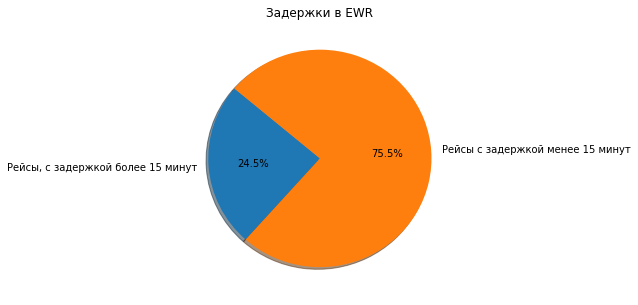

In [46]:
plt.figure(figsize=(5,5))
ewr=df[df['origin']=='EWR']['dep_delay'].reset_index()
l1=len(ewr)
l2=len(ewr[ewr['dep_delay']>15])
x=np.zeros(l1)
x[:l2]=100/l1
labels='Рейсы, с задержкой более 15 минут','Рейсы с задержкой менее 15 минут'
plt.pie([x.sum(),100-x.sum()],labels=labels,autopct='%1.1f%%',shadow=True,startangle=140)
plt.title("Задержки в EWR")
plt.show()

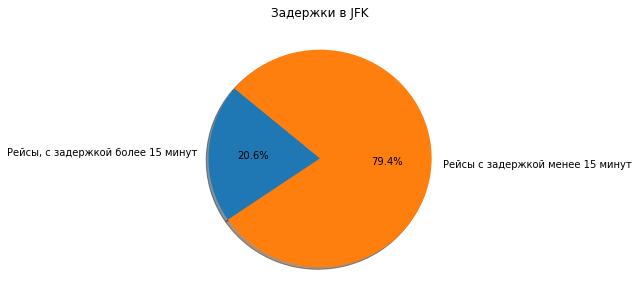

In [47]:
plt.figure(figsize=(5,5))
ewr=df[df['origin']=='JFK']['dep_delay'].reset_index()
l1=len(ewr)
l2=len(ewr[ewr['dep_delay']>15])
x=np.zeros(l1)
x[:l2]=100/l1
labels='Рейсы, с задержкой более 15 минут','Рейсы с задержкой менее 15 минут'
plt.pie([x.sum(),100-x.sum()],labels=labels,autopct='%1.1f%%',shadow=True,startangle=140)
plt.title("Задержки в JFK")
plt.show()

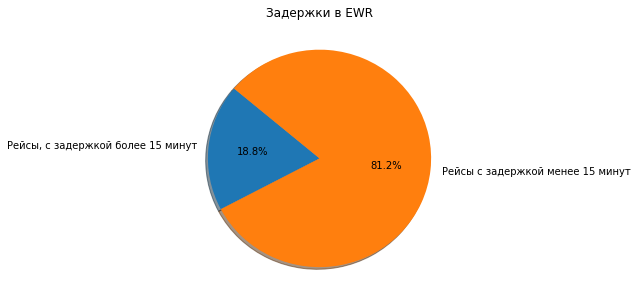

In [48]:
plt.figure(figsize=(5,5))
ewr=df[df['origin']=='LGA']['dep_delay'].reset_index()
l1=len(ewr)
l2=len(ewr[ewr['dep_delay']>15])
x=np.zeros(l1)
x[:l2]=100/l1
labels='Рейсы, с задержкой более 15 минут','Рейсы с задержкой менее 15 минут'
plt.pie([x.sum(),100-x.sum()],labels=labels,autopct='%1.1f%%',shadow=True,startangle=140)
plt.title("Задержки в EWR")
plt.show()

#### Вывод: Примерно 20% рейсов в Нью-Йорке вылетают с задержкой более 15 минут. Это достаточно много, учитывая поток людей в таком мегаполисе. Проблему нужно исследовать данную проблему

#### 2) Посмотрим в целом среднюю задержку отправки авиарейса для каждого аэропорта, а так же рассмотрим зависимость этого показателя по месяцам, чтобы выявить наиболее "тяжелые" месяцы. И проверим гипотезу - зависит ли средняя задержка от скорости ветра

In [9]:
#print(df[df['origin']=='EWR']['arr_delay'].mean(),df[df['origin']=='LGA']['arr_delay'].mean(),df[df['origin']=='JFK']['arr_delay'].mean())
print('Средняя задержка в EWR: {} минуты'.format(df[df['origin']=='EWR']['dep_delay'].mean()))
print('Средняя задержка в LGA: {} минуты'.format(df[df['origin']=='LGA']['dep_delay'].mean()))
print('Средняя задержка в JFK: {} минуты'.format(df[df['origin']=='JFK']['dep_delay'].mean()))

Средняя задержка в EWR: 15.009109769737123 минуты
Средняя задержка в LGA: 10.286582954320744 минуты
Средняя задержка в JFK: 12.023606743736192 минуты


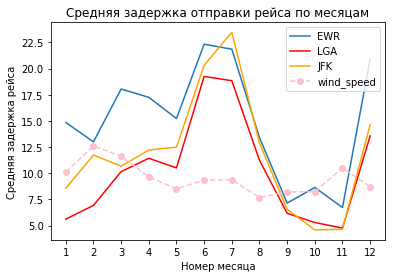

In [44]:

plt.plot(df[df['origin']=='EWR'].groupby('month')['dep_delay'].mean(),label='EWR')
plt.plot(df[df['origin']=='LGA'].groupby('month')['dep_delay'].mean(),color='red',label='LGA')
plt.plot(df[df['origin']=='JFK'].groupby('month')['dep_delay'].mean(),color='orange',label='JFK')
plt.plot(dfa.groupby('month')['wind_speed'].mean(), 'o--',color='pink')
plt.legend()
plt.title("Средняя задержка отправки рейса по месяцам")
plt.xlabel("Номер месяца")
plt.ylabel("Средняя задержка рейса")
plt.xticks(np.arange(1,13))
plt.show()

#### ВЫВОД: Руководству аэропортов надо обратить внимание на июнь и июль, в эти месяца средняя задержка отправки авиарейса превышает 20 минут. Это не связано со скоростью ветра.

#### 3) Посмотрим на "наихудшие" дни для каждого аэропорта

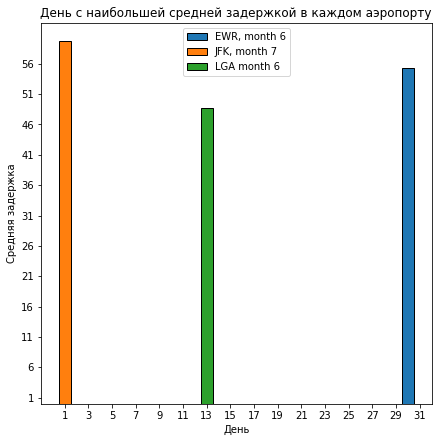

In [40]:
x=np.zeros(3,dtype=int)
y=np.zeros(3)
z=np.zeros(3)
labels = 'EWR','JFK','LGA'

for i in range(3):
    x[i]=df[df['origin']==labels[i]].groupby('month')['dep_delay'].mean().idxmax()
    y[i]=df[(df['month']==x[i]) & (df['origin']==labels[i]) ].groupby('day')['dep_delay'].mean().idxmax()
    z[i]=df[(df['month']==x[i]) & (df['origin']==labels[i]) ].groupby('day')['dep_delay'].mean().max()
labels = 'EWR, month {}'.format(x[0]),'JFK, month {}'.format(x[1]),'LGA month {}'.format(x[2])
plt.figure(figsize=(7,7))
for i in range(3):
    plt.bar(y[i],z[i],width=1, align='center',edgecolor='black',label=labels[i])

plt.xticks(np.arange(1,32)[::2])
plt.yticks(np.arange(1,61)[::5])
plt.title("День с наибольшей средней задержкой в каждом аэропорту")
plt.xlabel("День")
plt.ylabel("Средняя задержка")
plt.legend()
plt.show()
#x[1]=df[df['origin']=='JFK'].groupby('month')['dep_delay'].mean().idxmax()
#y[1]=df[df['month']==x[1]].groupby('day')['dep_delay'].mean().idxmax()
#x[2]=df[df['origin']=='LGA'].groupby('month')['dep_delay'].mean().idxmax()
#y[2]=df[df['month']==id1].groupby('day')['dep_delay'].mean().idxmax()
#plt.hist(np.arange(3),height=[z[0],z[1],z[2]])
#plt.xticks(np.arange(1,13))
#plt.yticks(np.arange(1,32))

#### Вывод: руководству стоит проанализировать, что происходило в указанные дни и провести анализ ошибок, тк средняя задержка ~50 минут - очень плохой показатель

#### 4) Посмотрим по часам, каковая средняя задержка отправки и прибытия авиарейсов

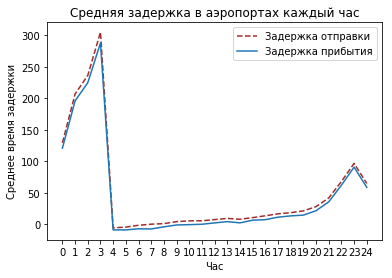

In [69]:
A=df.groupby('hour')['dep_delay'].mean()
B=df.groupby('hour')['arr_delay'].mean()
plt.plot(A,color='brown',ls='dashed',label='Задержка отправки')
plt.plot(B,label='Задержка прибытия')
plt.xticks(np.arange(25))
plt.title("Средняя задержка в аэропортах каждый час")
plt.xlabel("Час")
plt.ylabel("Среднее время задержки")
plt.legend()
plt.show()

#### Вывод: Очень сильно выделяются поздние часы, т.е промежуток времени с 23 до 3 часов утра. Возможно это связано с нехваткой персонала в данные часы работы.

#### 5) Рассмотрим направления, по которым процент задержек отправки авиарейсов более чем на 15 минут самый большой.

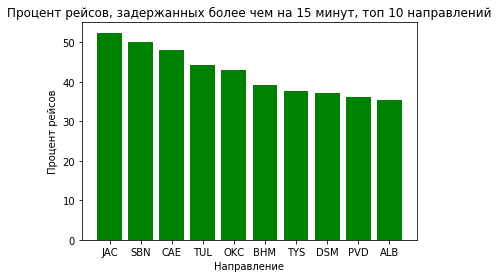

In [159]:
A=df[df['dep_delay']>15].groupby('dest')['dep_delay'].count()
B=df.groupby('dest')['dep_delay'].count()
C=(100*A/B).dropna()
D=C.sort_values()[::-1][:10].reset_index()
plt.bar(np.arange(10),D['dep_delay'],color='green')
plt.xticks(np.arange(10),D['dest'])
plt.title("Процент рейсов, задержанных более чем на 15 минут, топ 10 направлений")
plt.xlabel("Направление")
plt.ylabel("Процент рейсов")
plt.show()


#B=df.groupby('dest')['dep_delay'].size()
#print(A['dest'=='ABQ'])
#print(B['dest'=='ABQ'])
#print(A/B)

#### Вывод: нужно исследовать эти направления, тк они самые "проблемные"

#### 5) Проверим, связана ли проблемность направления с расстоянием

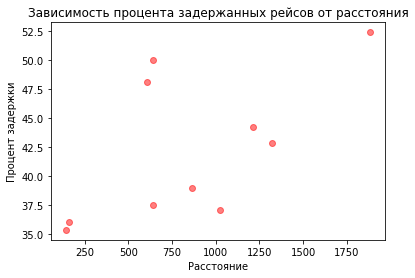

In [127]:
A=np.zeros(10)
for i in range(10):
    A[i]=df[df['dest']== D['dest'][i]]['distance'].drop_duplicates().mean()
plt.scatter(A,D['dep_delay'],alpha=0.5,color='red')
plt.title("Зависимость процента задержанных рейсов от расстояния")
plt.xlabel("Расстояние")
plt.ylabel("Процент задержки")
plt.show()

#### Вывод: самое проблемное направление - самое дальнее. Так что в целом можно сказать, что руководству стоит обращать внимание на дальние авиаперелеты

#### 6) Видим, что нахудший месяц по видимости - февраль

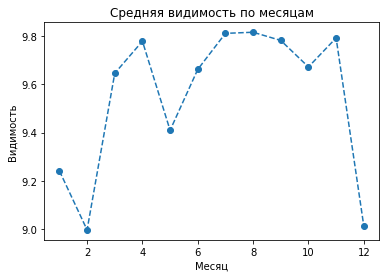

In [160]:
x=dfa.groupby('month')['visib'].mean()
plt.plot(x,'o--')
plt.title("Средняя видимость по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Видимость")
plt.show()


#### Вывод: возможно руководству стоит обратить внимание на месяца с декабря по февраль (месяца с наихудщей видимостью). Проверим это 

#### 7) Проверим гипотезу: связана ли средняя задержка с средней видимостью?

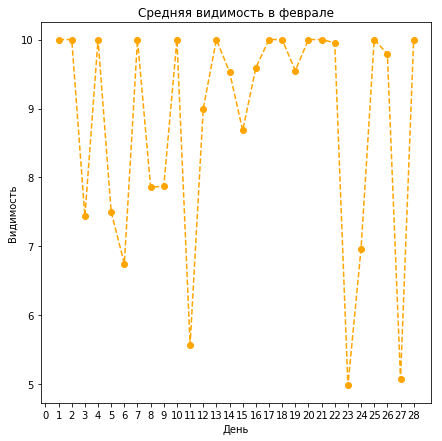

In [154]:
x=dfa[dfa['month']==2].groupby('day')['visib'].mean()
plt.figure(figsize=(7,7))
plt.plot(x,'o--',color='orange')
plt.xticks(np.arange(29))
plt.title("Средняя видимость в феврале")
plt.xlabel("День")
plt.ylabel("Видимость")
plt.show()

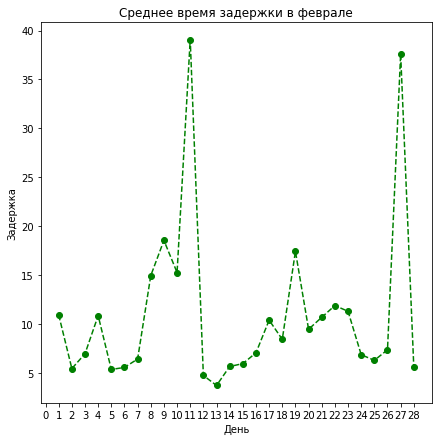

In [157]:
y=df[df['month']==2].groupby('day')['dep_delay'].mean()
plt.figure(figsize=(7,7))
plt.plot(y,'o--',color='green')
plt.xticks(np.arange(29))
plt.title("Среднее время задержки в феврале")
plt.xlabel("День")
plt.ylabel("Задержка")
plt.show()

#### Вывод: в дни наибольшей задержки видимость была наихудшей. Значит руководству прилагать больше усилий в дни плохой видимости.

#### 8) Проверим зависимость средней видимости и средней задержки прибытия авиарейса

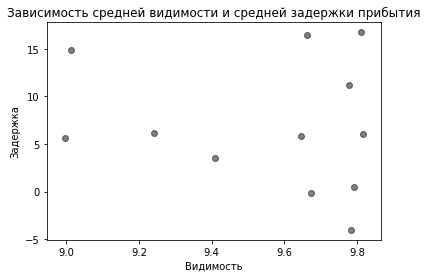

In [162]:
x=dfa.groupby('month')['visib'].mean()
y=df.groupby('month')['arr_delay'].mean()
plt.scatter(x,y,alpha=0.5,color='black')
plt.title("Зависимость средней видимости и средней задержки прибытия")
plt.xlabel("Видимость")
plt.ylabel("Задержка")
plt.show()

#### Вывод: Задержка прилета в целом никак не зависит от видимости. В 2 из 3 месяцах с наибольшей средней задержкой прибытия видимость была больше 9.6

#### 9) Посмотрим для каждого аэропорта на самые "непунктуальные компании"

In [ ]:
A=np.zeros(10)
for i in range(10):
    A[i]=df[df['dest']== D['dest'][i]]['distance'].drop_duplicates().mean()

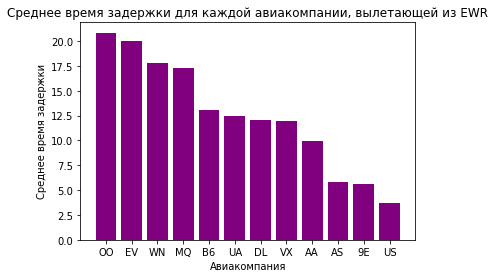

In [12]:
ewr=df[df['origin']=='EWR'].groupby('carrier')['dep_delay'].mean().sort_values()[::-1].reset_index()
plt.bar(np.arange(12),ewr['dep_delay'],color='purple')
plt.xticks(np.arange(12),ewr['carrier'])
plt.title("Среднее время задержки для каждой авиакомпании, вылетающей из EWR")
plt.xlabel("Авиакомпания")
plt.ylabel("Среднее время задержки")
plt.show()
        

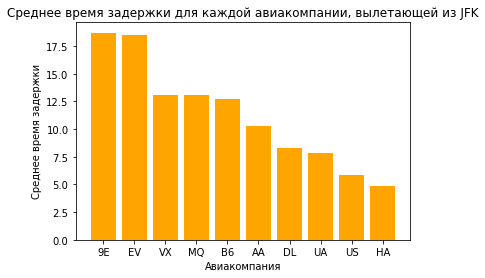

In [13]:
jfk=df[df['origin']=='JFK'].groupby('carrier')['dep_delay'].mean().sort_values()[::-1].reset_index()
plt.bar(np.arange(len(jfk)),jfk['dep_delay'],color='orange')
plt.xticks(np.arange(len(jfk)),jfk['carrier'])
plt.title("Среднее время задержки для каждой авиакомпании, вылетающей из JFK")
plt.xlabel("Авиакомпания")
plt.ylabel("Среднее время задержки")
plt.show()
        

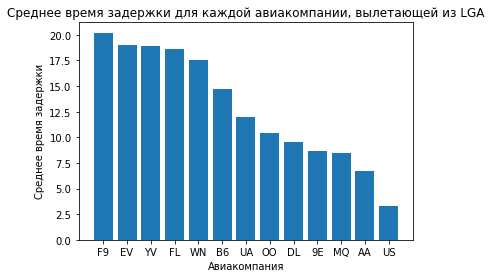

In [46]:
lga=df[df['origin']=='LGA'].groupby('carrier')['dep_delay'].mean().sort_values()[::-1].reset_index()
plt.bar(np.arange(len(lga)),lga['dep_delay'])
plt.xticks(np.arange(len(lga)),lga['carrier'])
plt.title("Среднее время задержки для каждой авиакомпании, вылетающей из LGA")
plt.xlabel("Авиакомпания")
plt.ylabel("Среднее время задержки")
plt.show()
        

#### Вывод: Руководству стоит детальнее изучить деятельность этих авиакомпаний и изучить почему их среднее время задержки самое большое. Возможно стоить применить санкции

#### 10) Так как июнь - месяц с самой большой средней задержкой, посмотрим на направление ветра в этом месяце и среднюю задержку

In [111]:
#wind=dfa[dfa['month']==6].groupby('day')['wind_dir'].mean().reset_index()['wind_dir']
wind=np.zeros(30,dtype=int)
for i in range(30):
    wind[i]=dfa[(dfa['month']==6)& (dfa['day']==i+1)]['wind_dir'].value_counts().idxmax()

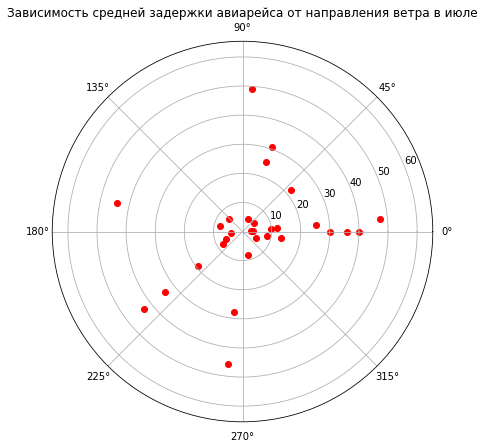

In [165]:
plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)
r=df[df['month']==6].groupby('day')['dep_delay'].mean()

ax.scatter(wind,r,color='r')
plt.title("Зависимость средней задержки авиарейса от направления ветра в июле")
plt.show()

#### Вывод: заметим, что, когда наиболее частое направление ветра от 90 до 135 и от 270 до 360, то больших задержек нет. Значит такие рейсы можно не анализировать.